# Bike Sharing Project - Group 15

Group Members:
*   Yusuf Tamince
*   Enis Mert Kuzu
*   Fethi Denker
*   Melih Gürsoy
*   Bilgehan Coşkun
*   Zehra Betül Danışman


## Introduction and Problem Statement

Bicycle sharing systems are attractive because of their positive effects on traffic, environment, and health but the most important thing is that the data they produce for research purposes. Departure and arrival time, place of use, and duration are clearly recorded in these systems. So, this data can be used to measure a city's mobility. In this project, we are trying to predict the number of bicycle demands  based on environmental and seasonal conditions. The core data set contains the hourly and daily count of rental bikes between 2011 and 2012 in the Capital bikeshare system Washington D.C., USA with the corresponding weather and seasonal information. Hourly count of bikes data contains more than 17.000 samples and 15 features.That's why, we consider the hourly based data. 

# **Step 1: Data Acquisition**

## Importing Packages

In this step, we import the Python packages which we will use throughout the project.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)


In [ ]:
from google.colab import drive
drive.mount('./drive')

Mounted at ./drive


## Loading Data
We have loaded the bike usage data specifying the hourly usage and dataframes have been created.

In [ ]:
filename = "hour.csv"
path = './drive/My Drive'
df = pd.read_csv(join(path, filename))
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# **Step 2: Utilized Dataset and Understanding the Data**

* Data Frame info specifying column names with their corresponding information such as dtype, length etc.
* Shape of Data Frame
* Checking for Abnormal Values
* Statistical Description of Data Frame





##Data Info Check

We have listed the column information with column index, name, dtype etc.Below code gives us the information about both the column names and their corresponding dtype which plays an important role.Each column must be examined due to the fact that there might be some columns with wrong data format.

In [ ]:
copy_df = df.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
print("Frame Shape:{}".format(df.shape))

Frame Shape:(17379, 17)


## Checking for Abnormal Values
We have checked for anomalies in some columns such as temperature, humidity, windspeed and concluded that there are no anomalies in the data.

In [ ]:
print("Number of rows where temperature is higher than 41 °C :",df[df["temp"] > 41].shape[0])
print("Number of rows where humidity is higher than 100% :",df[df["hum"] > 100].shape[0])
print("Number of rows where count of rentals is less than zero :",df[df["cnt"] <= 0].shape[0])
print("Number of rows where windspeed is less than zero :",df[df["windspeed"] < 0].shape[0])
print("Number of rows where casual rentals is less than zero :",df[df["casual"] < 0].shape[0])
print("Number of rows where registered rentals is less than zero :",df[df["registered"] < 0].shape[0])


Number of rows where temperature is higher than 41 °C : 0
Number of rows where humidity is higher than 100% : 0
Number of rows where count of rentals is less than zero : 0
Number of rows where windspeed is less than zero : 0
Number of rows where casual rentals is less than zero : 0
Number of rows where registered rentals is less than zero : 0


##Missing Value Handling and Data Cleaning

We have checked the data and there exists no missing value and the data is clean.

In [ ]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

##Summary of Statistical Data

Using describe function, we check some of the important statistical values such as count, mean, std etc.

In [ ]:
df.describe().round(2)

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.00,17379.00,17379.0,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00
mean,8690.00,2.50,0.5,6.54,11.55,0.03,3.00,0.68,1.43,0.50,0.48,0.63,0.19,35.68,153.79,189.46
std,5017.03,1.11,0.5,3.44,6.91,0.17,2.01,0.47,0.64,0.19,0.17,0.19,0.12,49.31,151.36,181.39
min,1.00,1.00,0.0,1.00,0.00,0.00,0.00,0.00,1.00,0.02,0.00,0.00,0.00,0.00,0.00,1.00
25%,4345.50,2.00,0.0,4.00,6.00,0.00,1.00,0.00,1.00,0.34,0.33,0.48,0.10,4.00,34.00,40.00
50%,8690.00,3.00,1.0,7.00,12.00,0.00,3.00,1.00,1.00,0.50,0.48,0.63,0.19,17.00,115.00,142.00
75%,13034.50,3.00,1.0,10.00,18.00,0.00,5.00,1.00,2.00,0.66,0.62,0.78,0.25,48.00,220.00,281.00
max,17379.00,4.00,1.0,12.00,23.00,1.00,6.00,1.00,4.00,1.00,1.00,1.00,0.85,367.00,886.00,977.00


# **Step 3: Normalizing the Data**

* We converted some data columns back to real values as they were divided by specific values to save memory storage. 
* To get the more understandable data, we change the integer numbers into corresponding strings.








##Convertion to Real Values

We converted some of the columns back to their original values.

In [ ]:
df["temp"]=df["temp"]*41
df["atemp"]=df["atemp"]*50
df["hum"]=df["hum"]*100
df["windspeed"]=df["windspeed"]*67

##Type Conversion

We converted some of the columns to category type  because we wanted to keep string values instead of integer values for future use.

In [ ]:
category_list = ['season', 'mnth','holiday', 'weekday', 'weathersit']
for var in category_list:
    df[var] = df[var].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     17379 non-null  int64   
 1   dteday      17379 non-null  object  
 2   season      17379 non-null  category
 3   yr          17379 non-null  int64   
 4   mnth        17379 non-null  category
 5   hr          17379 non-null  int64   
 6   holiday     17379 non-null  category
 7   weekday     17379 non-null  category
 8   workingday  17379 non-null  int64   
 9   weathersit  17379 non-null  category
 10  temp        17379 non-null  float64 
 11  atemp       17379 non-null  float64 
 12  hum         17379 non-null  float64 
 13  windspeed   17379 non-null  float64 
 14  casual      17379 non-null  int64   
 15  registered  17379 non-null  int64   
 16  cnt         17379 non-null  int64   
dtypes: category(5), float64(4), int64(7), object(1)
memory usage: 1.7+ MB


##Replacing Numerical Values with String Values

In order to make the data more readable, we have replaced numerical values with their corresponding strings.

In [ ]:
season_dict = {1:'Winter', 2:'Spring', 3:'Summer', 4:'Faller'}
weather_dict = {1:'Clear', 2:'Misty+Cloudy', 3:'Light Snow/Rain', 4:'Heavy Snow/Rain'}
month_dict= { 1 : "January", 2 : "February",3 : "March",4 : "April",5 : "May", 6 : "June",7 : "July", 8 : "August",9 : "September", 10 : "October",11 : "November",12 : "December"}
weekday_dict = {0:'Sunday',1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday',5 : "Friday", 6 : "Saturday"}

df['season'] = df['season'].map(season_dict)
df['weathersit'] = df['weathersit'].map(weather_dict)
df['mnth'] = df['mnth'].map(month_dict)
df['weekday'] = df['weekday'].map(weekday_dict)

df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,0,January,0,0,Saturday,0,Clear,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,Winter,0,January,1,0,Saturday,0,Clear,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,Winter,0,January,2,0,Saturday,0,Clear,9.02,13.635,80.0,0.0,5,27,32
3,4,2011-01-01,Winter,0,January,3,0,Saturday,0,Clear,9.84,14.395,75.0,0.0,3,10,13
4,5,2011-01-01,Winter,0,January,4,0,Saturday,0,Clear,9.84,14.395,75.0,0.0,0,1,1


In [ ]:
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,0,January,0,0,Saturday,0,Clear,9.84,14.395,81.0,0.0000,3,13,16
1,2,2011-01-01,Winter,0,January,1,0,Saturday,0,Clear,9.02,13.635,80.0,0.0000,8,32,40
2,3,2011-01-01,Winter,0,January,2,0,Saturday,0,Clear,9.02,13.635,80.0,0.0000,5,27,32
3,4,2011-01-01,Winter,0,January,3,0,Saturday,0,Clear,9.84,14.395,75.0,0.0000,3,10,13
4,5,2011-01-01,Winter,0,January,4,0,Saturday,0,Clear,9.84,14.395,75.0,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,Winter,1,December,19,0,Monday,1,Misty+Cloudy,10.66,12.880,60.0,11.0014,11,108,119
17375,17376,2012-12-31,Winter,1,December,20,0,Monday,1,Misty+Cloudy,10.66,12.880,60.0,11.0014,8,81,89
17376,17377,2012-12-31,Winter,1,December,21,0,Monday,1,Clear,10.66,12.880,60.0,11.0014,7,83,90
17377,17378,2012-12-31,Winter,1,December,22,0,Monday,1,Clear,10.66,13.635,56.0,8.9981,13,48,61


# **Step 4: Data Exploration and Analyzing The Data**

* We counted some of the columns' data and listed them.
* We drew bar plots for some columns to understand the relationship between bike usage and them.
* We drew box plots for some columns to understand the relationship between bike usage and them.
* We drew the line chart for casual and registered users to understand the relationship with some weather conditions. Thus, we were able to compare casual and registered users.
* A heatmap showing the correlation between data columns.

##Finding Counts of Some Columns

To better understand the data and check if any clear anomalies exist, we have listed the count of season, holiday, weekday data columns.

In [ ]:
df["season"].value_counts().to_frame()

,season
Summer,4496
Spring,4409
Winter,4242
Faller,4232


In [ ]:
df["holiday"].value_counts().to_frame()

,holiday
0,16879
1,500


In [ ]:
df[['cnt', 'holiday']].groupby(['holiday'], as_index = True).mean().sort_values(by = 'cnt')

,cnt
holiday,
1,156.87000
0,190.42858


In [ ]:
df["weekday"].value_counts().to_frame()

,weekday
Saturday,2512
Sunday,2502
Friday,2487
Monday,2479
Wednesday,2475
Thursday,2471
Tuesday,2453


In [ ]:
df[['cnt', 'weekday']].groupby(['weekday'], as_index = True).mean().sort_values(by = 'cnt')

,cnt
weekday,
Sunday,177.468825
Monday,183.744655
Saturday,190.209793
Wednesday,191.130505
Tuesday,191.238891
Friday,196.135907
Thursday,196.436665


In [ ]:
df[['cnt', 'season']].groupby(['season'], as_index = True).mean().sort_values(by = 'cnt')

,cnt
season,
Winter,111.114569
Faller,198.868856
Spring,208.344069
Summer,236.016237


##Bar Plots for Some Comparison

We have plotted the data of season, weather and months columns taking into account the bike usage as bar plots. We used a seaborn barplot because we thought it would be better to compare according to averages values

* Average Rental Bikes by Seasons and Average Rental Bikes by Weather Condition






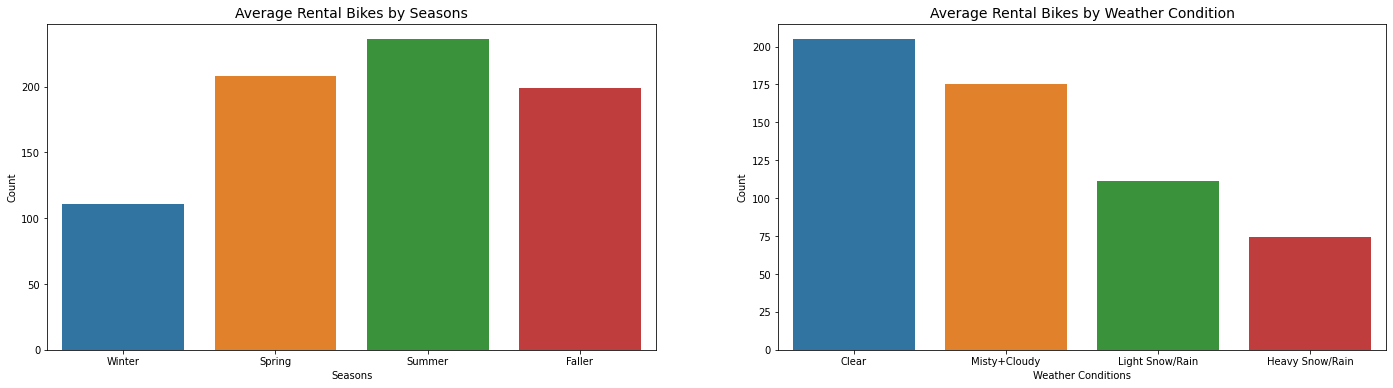

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(24, 6))
sns.barplot(x='season', y='cnt', data=df,ci=None,ax=ax[0])
ax[0].set_title("Average Rental Bikes by Seasons",fontsize=14)
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Seasons")

sns.barplot(x='weathersit', y='cnt', data=df,ci=None,ax=ax[1])
ax[1].set_title("Average Rental Bikes by Weather Condition",fontsize=14)
ax[1].set_ylabel("Count")
ax[1].set_xlabel("Weather Conditions")
plt.show()


1. *We see that the number of bike rentals is highest in Summer, followed by Spring, and low rental numbers in winter and Fall.*
2. *If we look at the weather conditions, the clear weather has the highest number of rentals.*




*  Average Rental Bike by months and Average Rental Bikes by holiday




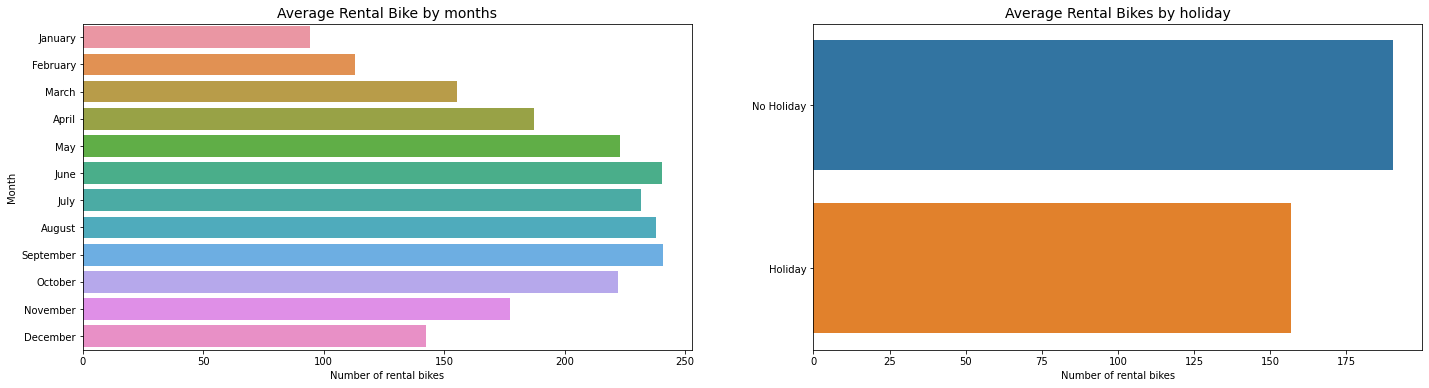

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(24, 6))
sns.barplot(x='cnt', y='mnth', data=df,ci=None,ax=ax[0])
ax[0].set_title('Average Rental Bike by months',fontsize=14)
ax[0].set_xlabel("Number of rental bikes")
ax[0].set_ylabel("Month")

sns.barplot(x='cnt',y='holiday',data=df,ci=None,ax=ax[1])
plt.yticks([0,1],['No Holiday','Holiday'])
ax[1].set_title('Average Rental Bikes by holiday',fontsize=14)
ax[1].set_xlabel("Number of rental bikes")
ax[1].set_ylabel("")
plt.show()



1. *From the monthly graph above, we can say that the rental numbers are highest in the summer months of June, July and August in Washington DC, while the fall months (September, October and November) have the second highest rate of bike rentals. In other words, the change of rental bikes by months is similar to the seasons.*
2. *We can see that total users tend to have less bike demand on holidays.*



## Box Plots for Some Comparison

We have plotted the data of year, hour and season columns taking into account the bike usage as box plots.



*   Rental Bikes by Year






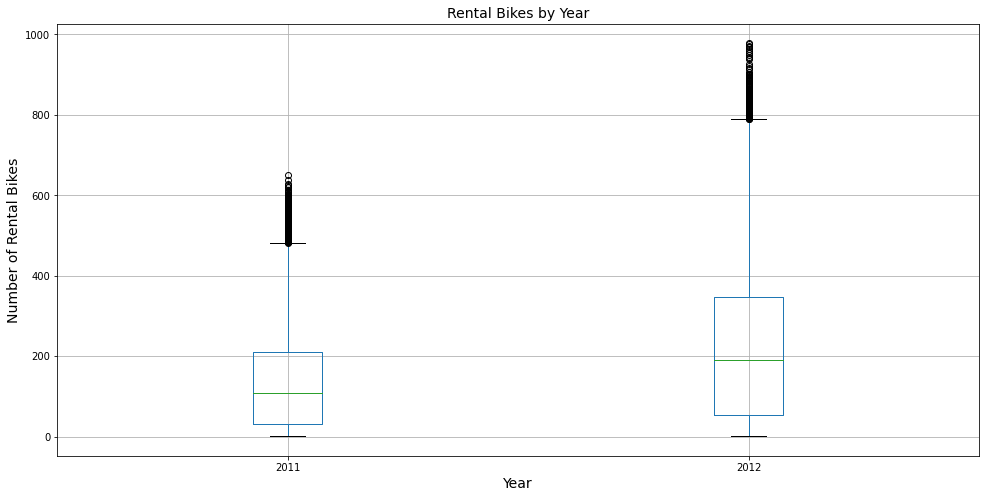

In [ ]:
ax=df.boxplot(by=['yr'],column='cnt', figsize=(16,8))
ax.set_title("Rental Bikes by Year",fontsize=14)
ax.set_xlabel("Year",fontsize=14)
ax.set_ylabel("Number of Rental Bikes",fontsize=14)
plt.xticks([1,2],[2011,2012])
plt.suptitle('')
plt.show()

*More bikes were rented in 2012 than in 2011, which may indicate that time has an effect on the bike rentals.*

*It is also seen that there are many outliers.*


*   Rental Bikes by Hour



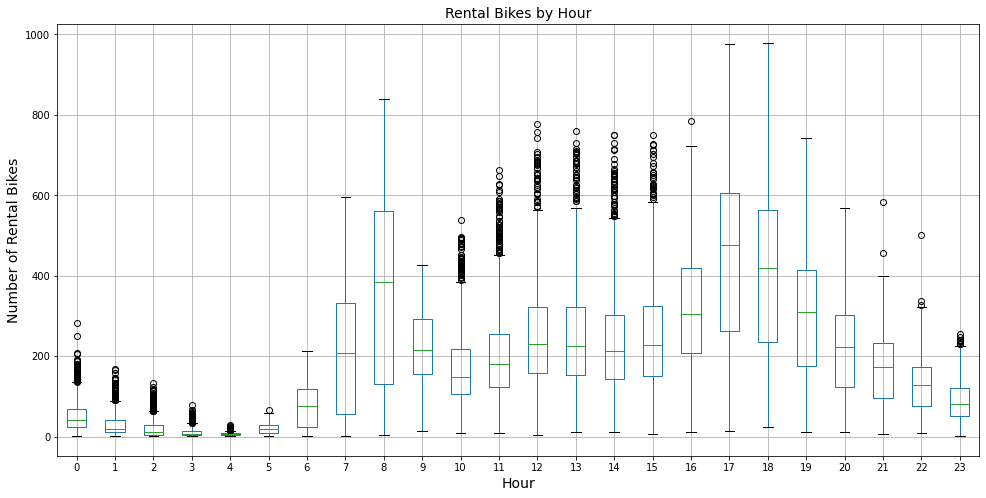

In [ ]:
ax = df.boxplot(by=['hr'], column='cnt', figsize=(16,8))
ax.set_title("Rental Bikes by Hour",fontsize=14)
ax.set_xlabel("Hour",fontsize=14)
ax.set_ylabel("Number of Rental Bikes",fontsize=14)
plt.suptitle('')
plt.show()


*This boxplot of bike rentals per hour shows that the average bike count is higher during peak hours such as morning (07:00 - 9:00) and evening (17:00 - 19:00).*


*  Rental Bikes by Season






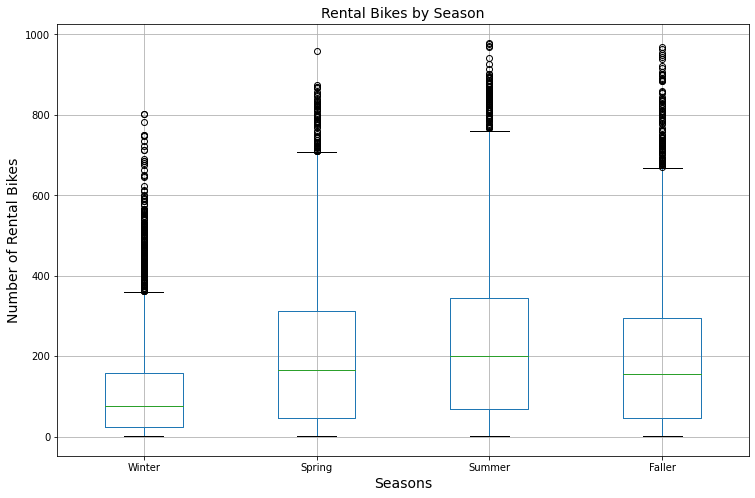

In [ ]:
ax = df.boxplot(by='season', column='cnt', figsize=(12,8))
ax.set_title("Rental Bikes by Season",fontsize=14)
ax.set_xlabel("Seasons",fontsize=14)
ax.set_ylabel("Number of Rental Bikes",fontsize=14)
plt.suptitle('')
plt.show()


*The lowest number of bikes were rented in the spring and the highest in the fall. However, there are too many outliers in winter and spring.*

## **Registered Users Demand vs Casual Users Demand**

Change in the number of registered and casual users by:

*   humidity
*   temperature



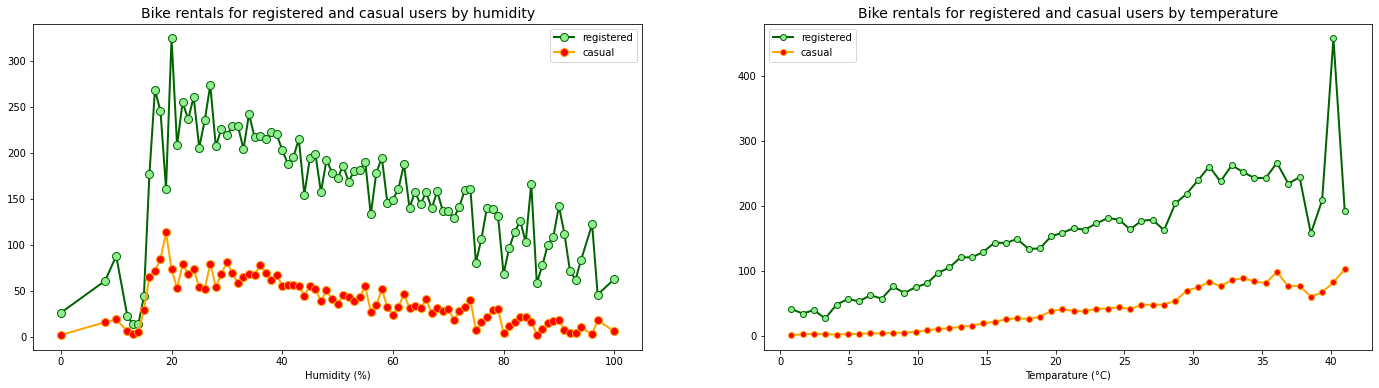

In [ ]:
register_hum = df.groupby(['hum'])['registered'].mean()
casual_hum =df.groupby(['hum'])['casual'].mean()

register_temp = df.groupby(['temp'])['registered'].mean()
casual_temp = df.groupby(['temp'])['casual'].mean()

fig,axes = plt.subplots(1,2,figsize=(24, 6))


register_hum.plot( marker='o', markerfacecolor='lightgreen', markersize=8, color='darkgreen', linewidth=2,ax=axes[0])
casual_hum.plot(color = 'orange',marker = 'o', markerfacecolor='red', markersize=8,linewidth=2,ax=axes[0])

register_temp.plot(color='darkgreen',marker='o', markerfacecolor='lightgreen', markersize=6, linewidth=2,ax=axes[1])
casual_temp.plot(color = 'orange',marker = 'o', markerfacecolor='red', markersize=6,linewidth=2,ax=axes[1])


axes[0].legend(loc='upper right')
axes[0].set_xlabel('Humidity (%)')
axes[0].set_title('Bike rentals for registered and casual users by humidity',fontsize=14)

axes[1].legend(loc='upper left')
axes[1].set_xlabel('Temparature (°C)')
axes[1].set_title('Bike rentals for registered and casual users by temperature',fontsize=14)


plt.show()


1. *We can see from above that bike rentals are more common when humidity is less, which may indicate that people are expected to avoid cycling as humidity increases due to more perspiration.*

2. *If we look at the variation of bike numbers with temperature, people like to ride more in a fairly warm temperature (the number of rides is high for temperatures above 30 degrees Celsius, but the expected number of passengers decreases as the temperature rises excessively.*



Change in the number of registered and casual users by:

*   windspeed
*   feeling temperature.

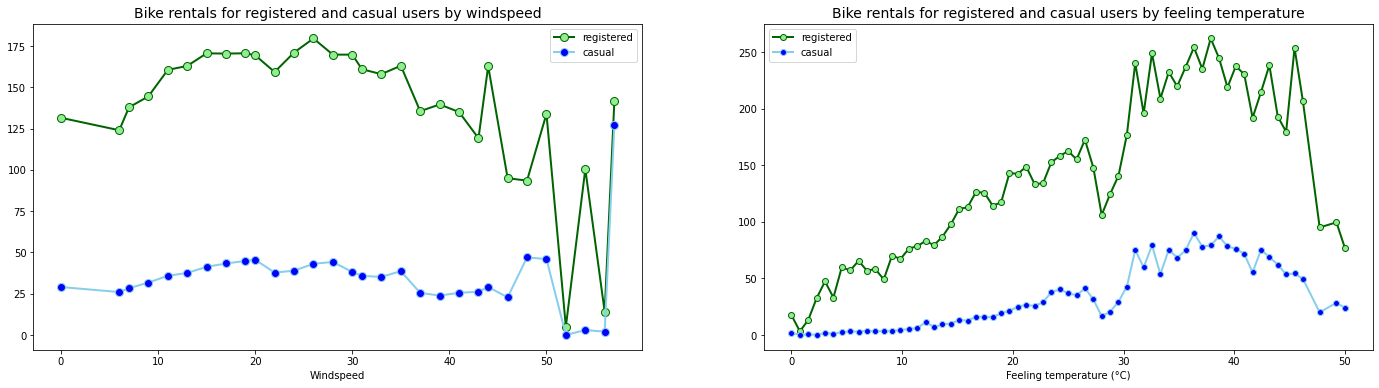

In [ ]:
register_wind = df.groupby(['windspeed'])['registered'].mean()
casual_wind = df.groupby(['windspeed'])['casual'].mean()

register_atemp = df.groupby(['atemp'])['registered'].mean()
casual_atemp = df.groupby(['atemp'])['casual'].mean()

fig,axes = plt.subplots(1,2,figsize=(24, 6))

register_wind.plot( marker='o', markerfacecolor='lightgreen', markersize=8, color='darkgreen', linewidth=2,ax=axes[0])
casual_wind.plot(color = 'skyblue',marker = 'o', markerfacecolor='blue', markersize=8,linewidth=2,ax=axes[0])

register_atemp.plot(color='darkgreen',marker='o', markerfacecolor='lightgreen', markersize=6, linewidth=2,ax=axes[1])
casual_atemp.plot(color = 'skyblue',marker = 'o', markerfacecolor='blue', markersize=6,linewidth=2,ax=axes[1])

axes[0].legend(loc='upper right')
axes[0].set_xlabel('Windspeed')
axes[0].set_title('Bike rentals for registered and casual users by windspeed',fontsize=14)

axes[1].legend(loc='upper left')
axes[1].set_xlabel('Feeling temperature (°C)')
axes[1].set_title('Bike rentals for registered and casual users by feeling temperature',fontsize=14)
plt.show()


1. *From the wind graph above, we can see that people prefer moderate wind speed as bike rental numbers are highest for low wind speed.*

2. *In addition, we can see that people are renting more bicycles in feeling temperatures between 30-40 degrees Celsius. However, this rate decreases in extreme heat.*



##Heatmap Showing Correlation

To better understand the relationships among the columns, we have generated a heatmap. 

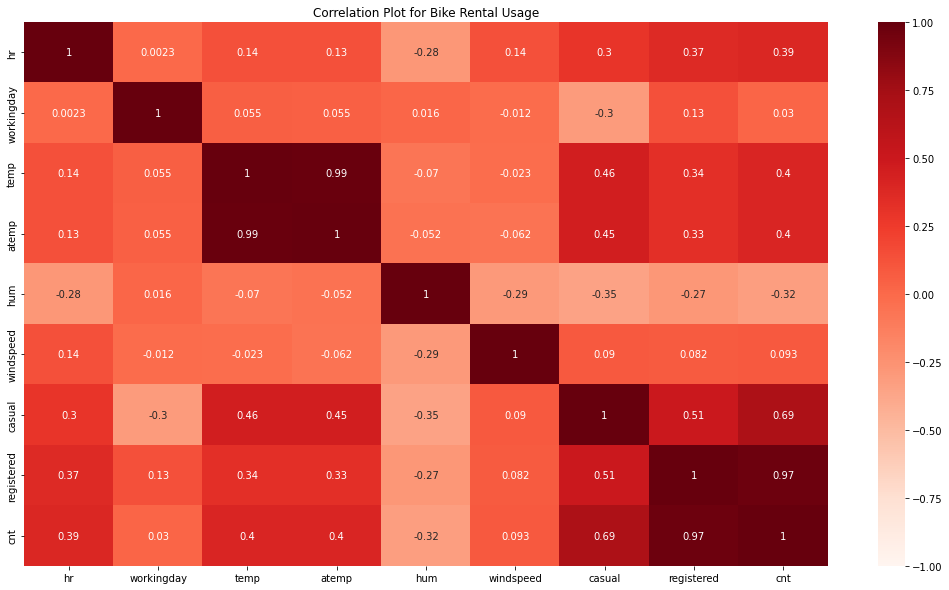

In [ ]:
df_drop=df.drop(columns=["instant","dteday","yr"])
corr=df_drop.corr()
plt.figure(figsize=(18,10))
plt.title("Correlation Plot for Bike Rental Usage",fontsize=12)
sns.heatmap(corr,cbar=True,annot=True ,cmap="Reds",vmin=-1)
plt.show()

*It can be said that there is some correlation in the total number of bicycles according to the feeling temperature and hour.*

# **Step 5: Hypothesis Testing**

* We determined the hypothesis.



### Determine the First Hypotheses
  - **Null Hypothesis ($\large{H_0}$)**: Average registered rides over weekdays-average registered rides over weekend=0

  - **Alternative Hypothesis ($\large{H_A}$)**: Average registered rides over weekdays-average registered rides over weekend≠0


In [ ]:
from scipy.stats import ttest_ind
weekend_days = ['Saturday', 'Sunday']
week_days=['Monday','Tuesday','Wednesday','Thursday','Friday']
weekend_mask = df['weekday'].isin(weekend_days)
workingdays_mask = df['weekday'].isin(week_days)

# select registered rides for the weekend and working days

weekend_data = df.registered[weekend_mask]

workingdays_data = df.registered[workingdays_mask]


In [ ]:
test_res = ttest_ind(weekend_data, workingdays_data)

print(f"Statistic value: {test_res[0]:.03f}, p-value: {test_res[1]}")


Statistic value: -16.004, p-value: 3.0911815856939266e-57


*The resulting p-value from this test is far below the standard critical 0.05 value. As a conclusion, we can reject the null hypothesis and confirm that our initial observation is correct: that is, there is a statistically significant difference between the number of rides performed during working days and the weekend.*


### Determine the Second Hypotheses
  - **Null Hypothesis ($\large{H_0}$)**: Average summer rides - average winter rides =0

  - **Alternative Hypothesis ($\large{H_A}$)**: Average summer rides -average winter rides≠0



In [ ]:
summer_mean = df[df["season"]=="Summer"].mean()
winter_mean = df[df["season"]=="Winter"].mean()
test_res = ttest_ind(summer_mean, winter_mean)
print(f"Statistic value: {test_res[0]}, p-value: {test_res[1]}")


Statistic value: 0.30919409869770154, p-value: 0.7603719375438311


*The p-value from this test is well above the standard critical value of 0.05. Consequently, the null hypothesis cannot be rejected. So, there is no statistically significant difference between the number of driving in summer days and winter.*


# **Step 6: Machine Learning**
We will try three Machine Learning Algorithms and determine which method is best. These Algorithms are:
- RandomForestRegressor
- LinearRegression
- KNeighborsRegressor

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.metrics import r2_score

## Split the data into train (70%), validation (15%) and test (15%).


We dropped instant, dteday, holiday, year, windspeed, casual and registered columns since they do not give any important information.Also we dropped the temperature(temp) because we use apparent temperature (atemp) instead of temperature.


In [ ]:
X=copy_df.drop(["instant","dteday","cnt","temp","holiday","yr","windspeed","casual","registered"],axis=1)
y=copy_df["cnt"]
X

,season,mnth,hr,weekday,workingday,weathersit,atemp,hum
0,1,1,0,6,0,1,0.2879,0.81
1,1,1,1,6,0,1,0.2727,0.80
2,1,1,2,6,0,1,0.2727,0.80
3,1,1,3,6,0,1,0.2879,0.75
4,1,1,4,6,0,1,0.2879,0.75
...,...,...,...,...,...,...,...,...
17374,1,12,19,1,1,2,0.2576,0.60
17375,1,12,20,1,1,2,0.2576,0.60
17376,1,12,21,1,1,1,0.2576,0.60
17377,1,12,22,1,1,1,0.2727,0.56


**We splitted the data into train, validation, test.We use a validation set since validation data provides the first test against unseen data, allowing us to evaluate how well the model makes predictions based on the new data. Also, it will provide some helpful information to optimize hyperparameters, which influence how the model assesses data.**

In [ ]:
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.30, random_state=2021)
X_test, X_val, y_test, y_val = train_test_split(X_remaining, y_remaining, test_size=0.50, random_state=2021)

###**Random Forest Method**
* We used the RMSLE which is the Root Mean Squared Log Error of the values to validate since in the case of RMSE, the presence of outliers can explode the error term to a very high value. However, in the case of RMLSE, outliers are greatly minimized, so we minimize their effect. Also,if the predicted responses are very close to the true responses the RMSLE will be small.

* We also found the R2 score because fitting our model to the regression with high accuracy was the important.So, R-squared is a goodness-of-fit measure for regression models. Also, it represents the proportion of variance (of y) that has been explained by the independent variables in the model.


In [ ]:
Method_ListScore=[]
Method_List = ['Random Forest','Linear Regression','KNN',]

In [ ]:
rfModel = RandomForestRegressor()
rfModel.fit(X_train,y_train)
rfPred = rfModel.predict(X_val)
a=np.sqrt(mean_squared_log_error(rfPred,y_val))
b=r2_score(y_val,rfPred)
Method_ListScore.append(a)

print("RandomForestRegressor RMSLE for Validation Group:",a)
print("RandomForestRegressor R2 Score for Validation Group:",b)

RandomForestRegressor RMSLE for Validation Group: 0.4202469761060266
RandomForestRegressor R2 Score for Validation Group: 0.8554311698588277


###**LinearRegression Method**

In [ ]:
lrModel = LinearRegression()
lrModel.fit(X_train,np.log1p(y_train))
lrPred = lrModel.predict(X_val)
lrPred = pd.DataFrame(lrPred)
lrPred = lrPred[0].apply(lambda x:0.0 if x<0 else x)
a=np.sqrt(mean_squared_log_error(np.exp(lrPred),y_val))
b=r2_score(y_val,np.exp(lrPred))
Method_ListScore.append(a)

print("LinearRegression RMSLE for Validation Group:",a)
print("LinearRegression R2 Score for Validation Group:",b)

LinearRegression RMSLE for Validation Group: 1.0452135917596068
LinearRegression R2 Score for Validation Group: 0.18509002755687165


###**KNeighborsRegressor Method**

In [ ]:
knnModel = KNeighborsRegressor()
knnModel.fit(X_train,y_train)
knnPred = knnModel.predict(X_test)
a=np.sqrt(mean_squared_log_error(knnPred,y_test))
b=r2_score(y_test,knnPred)
Method_ListScore.append(a)

print("KNN RMSLE for Validation Group:",a)
print("KNN R2 Score for Validation Group:",b)

KNN RMSLE for Validation Group: 0.4513157152818482
KNN R2 Score for Validation Group: 0.8164262290970945


###Deciding which model is best

In [ ]:
results = pd.DataFrame({'ML Algorithm':Method_List,'RSMLE':Method_ListScore})
results.sort_values('RSMLE',ascending=True)

,ML Algorithm,RSMLE
0,Random Forest,0.420247
2,KNN,0.451316
1,Linear Regression,1.045214


Text(0, 0.5, 'RMSLE Scores')

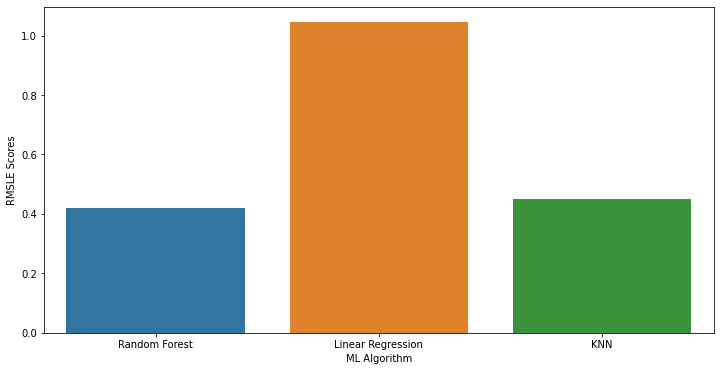

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=results,x='ML Algorithm',y='RSMLE')
plt.ylabel("RMSLE Scores")

*After examining all three machine learning methods, due to their results RMSLE score (also considering the R2 score), we decided that the best one was the random forest method. Based on this result, we prepared the feature importance.*

In [ ]:
feat_importances = pd.DataFrame(rfModel.feature_importances_, index=X_val.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances

,Importance
hr,0.604112
atemp,0.168442
hum,0.068488
workingday,0.052588
mnth,0.030635
weekday,0.026440
season,0.024680
weathersit,0.024615


*We plotted the graph of importance of features.*

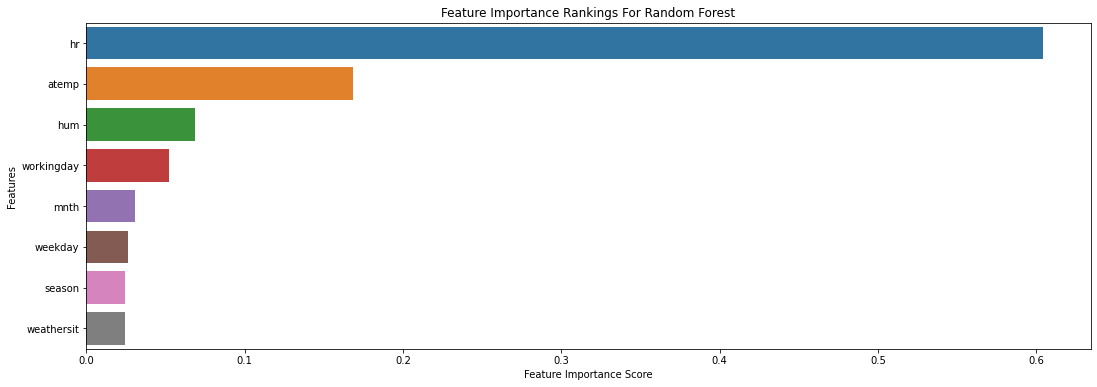

In [ ]:
feature_importances = pd.Series(rfModel.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(18, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Feature Importance Rankings For Random Forest")
plt.show()

As we can see the most important variables for Random Forest are:
*   The Hour (hr) with 60%
*   The Apparent Temperature (atemp) with 16.7%
*   The humitidy with 6.8%

## Hyperparameter Tunning
Finding the best paramaters for Random Forest Model


*We tried to find which n_estimators value gives the best(min) RMSLE score*

In [ ]:
from sklearn.metrics import auc, precision_recall_curve
n_estimators= [100,200,300,400,500,600,700,800,900,1000]
est_R2_list=[]
max_pred=1
max_est=0
for est in n_estimators:
  model_rf = RandomForestRegressor(n_estimators=est,random_state=2021)
  model_rf.fit(X_train, y_train)
  rfPred = model_rf.predict(X_val)
  a=np.sqrt(mean_squared_log_error(rfPred,y_val))
  est_R2_list.append(a)
  if  max_pred > a:
    max_pred=a
    max_est=est
  print("n_estimators", est, ", RMSLE Score: ", a)

print("\nn_estimator number that has the min RMSLE value is",max_est)

n_estimators 100 , RMSLE Score:  0.4218252576249485
n_estimators 200 , RMSLE Score:  0.42115364362034846
n_estimators 300 , RMSLE Score:  0.421251487117327
n_estimators 400 , RMSLE Score:  0.42108001611808954
n_estimators 500 , RMSLE Score:  0.42091894261600044
n_estimators 600 , RMSLE Score:  0.42044329976173656
n_estimators 700 , RMSLE Score:  0.42023096614388505
n_estimators 800 , RMSLE Score:  0.4202954244240898
n_estimators 900 , RMSLE Score:  0.42017100005210306
n_estimators 1000 , RMSLE Score:  0.42015715969808914

n_estimator number that has the min RMSLE value is 1000


*We tried to find best number of features value that gives the best (min) RMSLE score.*

In [ ]:
max_feature= [2,3,4,5,6,7,8]
max_pred2=1
feat_R2_list=[]
max_f=0
for feature in max_feature:
  model_rf = RandomForestRegressor(n_estimators=max_est,random_state=2021,max_features=feature)
  model_rf.fit(X_train, y_train)
  rfPred = model_rf.predict(X_val)
  a=np.sqrt(mean_squared_log_error(rfPred,y_val))
  feat_R2_list.append(a)
  if  max_pred2 > a:
    max_pred2=a
    max_f=feature
  print("max_feature", feature, ", RMSLE: ", a)
print("\nmax_feature number that has the min RMSLE value is",max_f)


max_feature 2 , RMSLE:  0.5118257066358647
max_feature 3 , RMSLE:  0.4433466455661577
max_feature 4 , RMSLE:  0.4179886020691077
max_feature 5 , RMSLE:  0.41334746948390405
max_feature 6 , RMSLE:  0.4134259472835266
max_feature 7 , RMSLE:  0.4162302985059429
max_feature 8 , RMSLE:  0.42015715969808914

max_feature number that has the min RMSLE value is 5


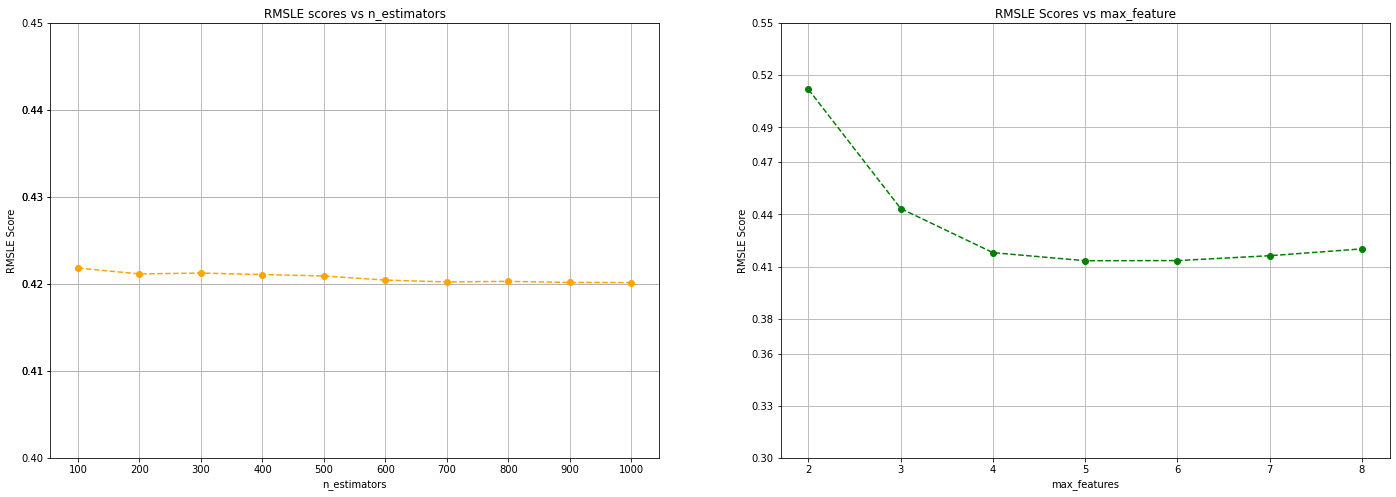

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(24, 8))
yticks=np.around(np.linspace(0.3,0.55,num=10),decimals=2)
yticks2=np.around(np.linspace(0.4,0.45,num=10),decimals=2)

ax[0].plot(n_estimators,est_R2_list,linestyle='dashed', marker='o',color='orange')
ax[0].set_xticks(n_estimators)
ax[0].set_yticks(yticks2)
ax[0].grid(True)
ax[0].set_title("RMSLE scores vs n_estimators")
ax[0].set_xlabel("n_estimators")
ax[0].set_ylabel("RMSLE Score")

ax[1].plot(max_feature,feat_R2_list,linestyle='dashed', marker='o' ,color='g')
ax[1].set_yticks(yticks)
ax[1].set_xticks(max_feature)
ax[1].grid(True)
ax[1].set_title("RMSLE Scores vs max_feature")
ax[1].set_xlabel("max_features")
ax[1].set_ylabel("RMSLE Score")
plt.show()

##Prediction of Test values

*After found the best parameters, we trained the values with the new parameters.*

In [ ]:
rfModel = RandomForestRegressor(n_estimators=max_est,max_features=max_f,random_state=2021)
rfModel.fit(X_train,y_train)

RandomForestRegressor(max_features=5, n_estimators=1000, random_state=2021)

*We predicted the test values with the new Random Forest Model*

In [ ]:
rfPred = rfModel.predict(X_test)
a=np.sqrt(mean_squared_log_error(rfPred,y_test))
b=r2_score(y_test,rfPred)
print("RMSLE for Test Test Group:",a)
print("R2 Score for Test Group:",b)

RMSLE for Test Test Group: 0.39798184103853207
R2 Score for Test Group: 0.861865245682876


We have a 0.86 R2 Score and 0.397 RMSLE this high values indicates a good fit for the regression model.

*We drew a feature importance graph for our new model.*

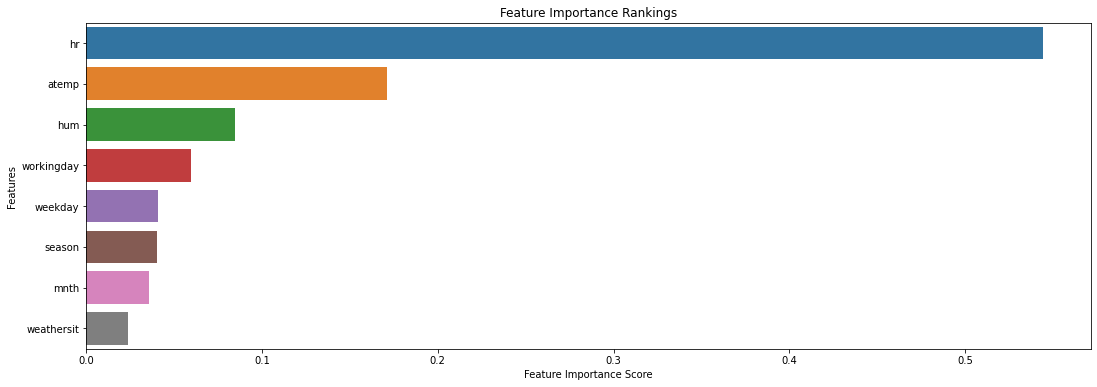

In [ ]:
feature_importances = pd.Series(rfModel.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(18, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Feature Importance Rankings")
plt.show()

In [ ]:
feat_importances = pd.DataFrame(rfModel.feature_importances_, index=X_val.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances

,Importance
hr,0.544126
atemp,0.170876
hum,0.084546
workingday,0.059817
weekday,0.040947
season,0.040152
mnth,0.035927
weathersit,0.023609


As we can see the most important variables for New Random Forest Model are:
*   The Hour (hr) with 54.4%
*   The Apparent Temperature (atemp) with 17%
*   The humitidy with 8.4%

In addition to the first three important features, there were important changes in the percentage of months, days, and seasons of our new model.

*We plotted the graph of the differences between predicted values and test values,so we can see how compatible they are*

Text(0.5, 0, 'Index value')

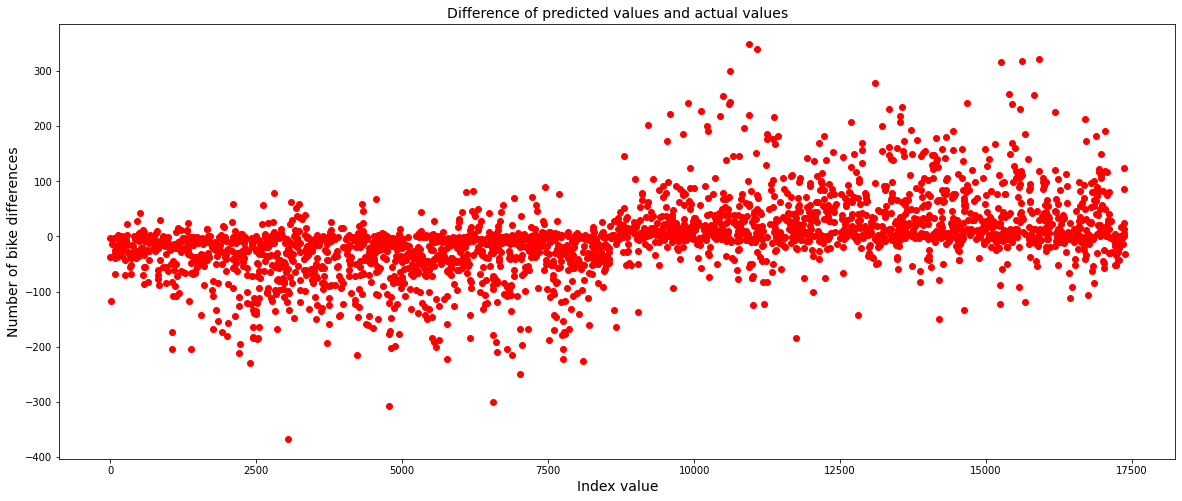

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(20, 8))
ax.plot(y_test- rfPred,marker='o',linestyle='',color='r')
ax.set_title("Difference of predicted values and actual values",fontsize=14)
ax.set_ylabel("Number of bike differences",fontsize=14)
ax.set_xlabel("Index value",fontsize=14)

**We can clearly understand that the difference between the predicted values and the actual values is close because the scatters are mostly concentrated around 0.**

*We also visualized our predictions by taking a sample of 100 lengths from the test values and their actual values.*

In [ ]:
myList = list(range(0, 99))
Arrayx=np.array(myList)
Arrayy=np.array(y_test[1:100].values)

Text(0, 0.5, 'Scores')

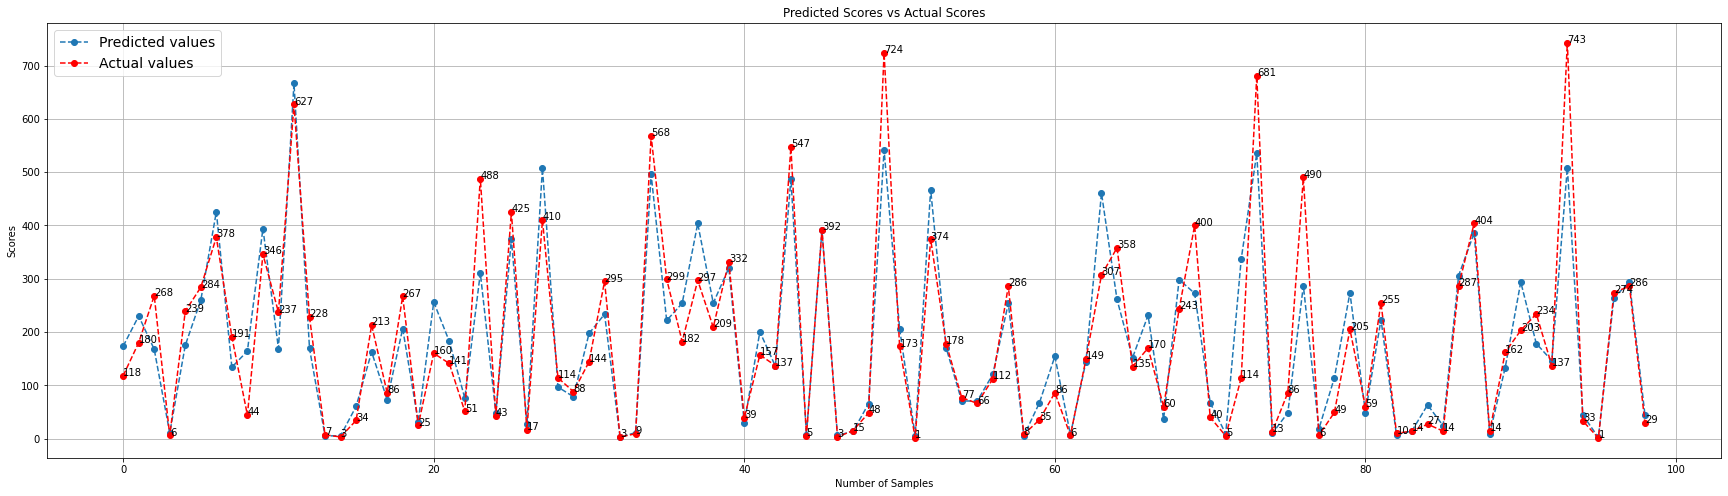

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(30, 8))

ax.plot(rfPred[1:100],linestyle='dashed', marker='o',label="Predicted values")
ax.plot(y_test[1:100].values,linestyle='dashed', marker='o',color="r",label="Actual values")
z=np.copy(y_test[1:100])
for i, txt in enumerate(z):
  plt.annotate(txt,(Arrayx[i],Arrayy[i]))

ax.legend(loc="upper left",fontsize=14)
ax.grid(True)
ax.set_title("Predicted Scores vs Actual Scores")
ax.set_xlabel("Number of Samples")
ax.set_ylabel("Scores")

*As can be seen from the graph, our Machine learning algorithm estimates the number of rental bikes with high closeness.*

# **Step 7: Conclusion**
This extensive exploratory data analysis and machine learning have helped us analyze key patterns and features of the bike share network with Capital Bikeshare's goal of predicting the number of bike rentals. We also made a good contribution to this rental system with the high proximity rate in the number of bike rentals. 
Thus, the company will have an advantage by allocating suitable bike stock.
On the other hand, the fact that the numbers in our estimates of the number of bicycles are sometimes below the number of bikes used may be a disadvantage for the company using this algorithm, but the overall contribution of our high proximity rate should be considered. Some key points about our research:

1. We found that the number of Bike Rentals is highly dependent on time and  feeling temperature.

2. We cleary see that KNN and Random Forest are good Machine Learning models for our data because performed much better than linear regression. 

3. It is clearly seen that there is an interaction between variables, such as an hour and day of the week, etc. For this reason, the tree-based model which is Random Forest in this project is able to capture nonlinear relationships. For instance, the hours and the temperature do not have a linear relationship, so if it is extremely hot or cold then the bike rentals can drop.

4. Our Machine Learning model has an RMSLE (Root Mean Square Logarithmic Error) score of 0.39 and an R2 (coefficient of determination) score of 0.86 on the test dataset, which looks promising and very good.

# **Step 8: Future Work**
As a result, improvements can be made in future projects by using this project as a template. The bike rental data of different countries can be used for understanding the general opinion of what variables to pay attention to in order to determine how many bicycles should be placed in bicycle rental places anywhere in the world. 

Likewise, if you want to work more specifically, data from cities of different countries’ bike rentals can be used. Variables that we do not use (whether rental days are holidays or not, years, wind speed, whether the bike users are registered or not) can be used. With this information, different hypotheses can be formed and proven. In addition, more machine learning algorithms can be tried and the rate of approaching the best result can be increased


# **Division of Work**

All team members contributed equally. Each part of the report and the students who contributed to them are listed below:

* Data Acqusition: Melih Gürsoy, Betül Danışman
* Understanding the Data: Enis Mert Kuzu, Fethi Denker
* Normalizing the Data: Bilgehan Coşkun, Yusuf Tamince
* Analyzing the Data: Melih Gürsoy, Enis Mert Kuzu, Bilgehan Coşkun
* Finding the Hypothesis and Testing: Fethi Denker, Betül Danışman, Yusuf Tamince
*   Machine Learning Algorithms: Enis Mert Kuzu, Betül Danışman, Fethi Denker


